# Цель проекта

- Проанализировать данные по недвижимости в Санкт-Петербурге и других городах России
- Узнать о предложениях по недвижимости в стране
- Сформулировать предложения, где выгодней всего приобретать квартиры с большим возвратом инвестиции

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('real_estate_data.csv', sep = '\t') 

In [4]:
df = df.drop_duplicates() # Убираем дубликаты
df['days_exposition'] = df['days_exposition'].fillna(0) # Заполняем пустые значения

In [5]:
cities = df.groupby('locality_name').agg({'total_images': 'count'}).reset_index().sort_values(by='total_images', ascending=False)
cities = cities[cities['total_images'] > 50]  
data = pd.merge(cities, df, on='locality_name', how='left') # Показываем города где больше 50 объявлении, чтобы работать над частью для быстроты

In [6]:
# Считаем цену за квадратный метр 

data['price_per_sqm'] = data['last_price'] / data['total_area'] #Поделим общую цену на общую площадь чтобы получить цену за кв/метр
print(data[['last_price', 'total_area', 'price_per_sqm']])


       last_price  total_area  price_per_sqm
0      13000000.0       108.0  120370.370370
1       5196000.0        56.0   92785.714286
2      64900000.0       159.0  408176.100629
3      10000000.0       100.0  100000.000000
4       7915000.0        71.6  110544.692737
...           ...         ...            ...
21631   1930000.0        47.0   41063.829787
21632   1800000.0        36.0   50000.000000
21633   2900000.0        63.0   46031.746032
21634   1950000.0        44.2   44117.647059
21635   1100000.0        62.0   17741.935484

[21636 rows x 3 columns]


In [7]:
# Выделяем только данные из города Санкт-Петербург

data_spb = data[data['locality_name'] == 'Санкт-Петербург'] 
data_spb

,locality_name,total_images_x,total_images_y,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,...,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_sqm
0,Санкт-Петербург,15721,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,...,25.00,NaN,18863.0,16028.0,1.0,482.0,2.0,755.0,0.0,120370.370370
1,Санкт-Петербург,15721,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,...,8.30,0.0,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.714286
2,Санкт-Петербург,15721,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,...,NaN,0.0,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.100629
3,Санкт-Петербург,15721,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,...,41.00,NaN,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.000000
4,Санкт-Петербург,15721,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,...,18.90,2.0,23982.0,11634.0,0.0,NaN,0.0,NaN,0.0,110544.692737
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15716,Санкт-Петербург,15721,13,3550000.0,35.30,2018-02-28T00:00:00,1,2.86,15.0,16.3,...,9.10,2.0,17284.0,16081.0,1.0,353.0,2.0,652.0,29.0,100566.572238
15717,Санкт-Петербург,15721,3,5500000.0,52.00,2018-07-19T00:00:00,2,NaN,5.0,31.0,...,6.00,NaN,20151.0,6263.0,1.0,300.0,0.0,NaN,15.0,105769.230769
15718,Санкт-Петербург,15721,11,9470000.0,72.90,2016-10-13T00:00:00,2,2.75,25.0,40.3,...,10.60,1.0,19424.0,4489.0,0.0,NaN,1.0,806.0,519.0,129903.978052
15719,Санкт-Петербург,15721,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,...,13.83,NaN,24665.0,4232.0,1.0,796.0,3.0,381.0,0.0,72490.845228


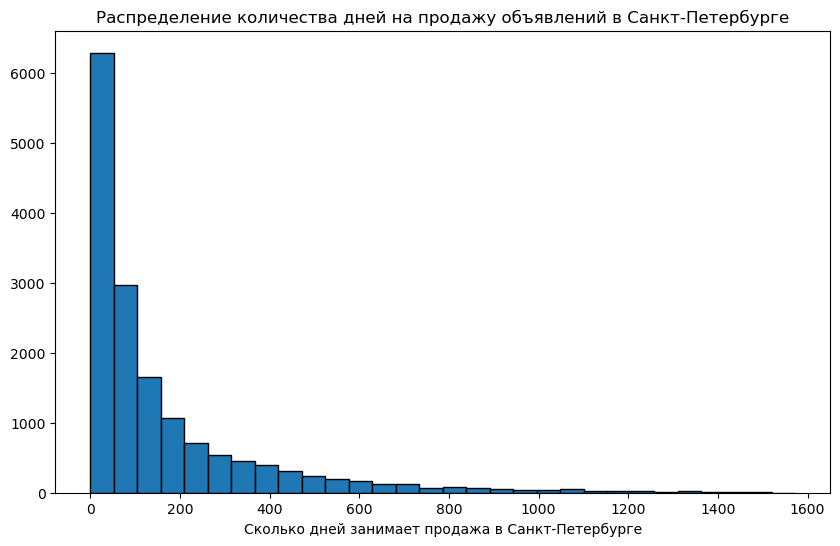

In [8]:
# Сколько примерно дней занимает продажа объявлений в Санкт-Петербурге?

data_spb = data[data['locality_name'] == 'Санкт-Петербург']

if 'days_exposition' in data_spb.columns:
    days_exposition = data_spb['days_exposition'].dropna()
else:
    data_spb['first_day_exposition'] = pd.to_datetime(data_spb['first_day_exposition'])
    data_spb['last_day_exposition'] = pd.to_datetime(data_spb['last_day_exposition'])
    data_spb['days_exposition'] = (data_spb['last_day_exposition'] - data_spb['first_day_exposition']).dt.days
    days_exposition = data_spb['days_exposition'].dropna()


plt.figure(figsize=(10,6))
plt.hist(days_exposition, bins=30, edgecolor='black')
plt.title('Распределение количества дней на продажу объявлений в Санкт-Петербурге')
plt.xlabel('Сколько дней занимает продажа в Санкт-Петербурге')
plt.show()

Продажа квартир в Санкт-Петербурге занимает в среднем около 81 дня. Это время может варьироваться в зависимости от различных факторов, таких как тип недвижимости, цена, местоположение и состояние квартиры. Данный срок отражает общую динамику рынка и может быть использован как ориентир для инвесторов и продавцов при планировании сделок.

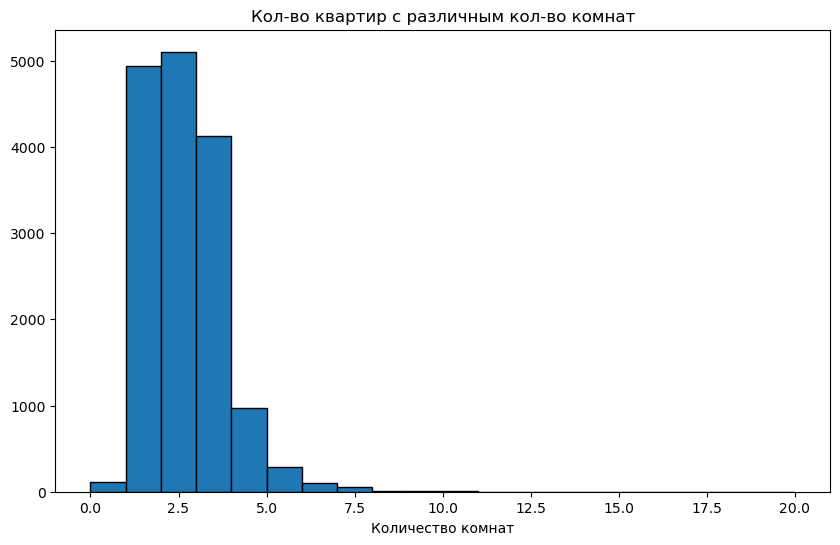

In [10]:
# Создаем гистограмму сколько обычно комнат в квартирах Санкт-Петербурга (Часто встречающиеся значения)

data_spb_rooms = data[data['locality_name'] == 'Санкт-Петербург']

rooms = data_spb_rooms['rooms']

plt.figure(figsize=(10,6))
plt.hist(rooms, bins=range(int(rooms.min()), int(rooms.max()) + 2), edgecolor='black')
plt.title('Кол-во квартир с различным кол-во комнат')
plt.xlabel('Количество комнат')
plt.show()

В Санкт-Петербурге квартиры в основном имеют 1, 2 и 3 комнаты. Наиболее часто встречаются однокомнатные квартиры, что обусловлено высоким спросом на жилье для одиночек и молодых семей. Двухкомнатные квартиры также популярны, так как они предлагают баланс между комфортом и ценой. Трехкомнатные квартиры имеют меньший спрос, но все же находят своих покупателей. Эти тенденции показывают, что квартиры с 1-3 комнатами лучше всего подходят для различных категорий жильцов.

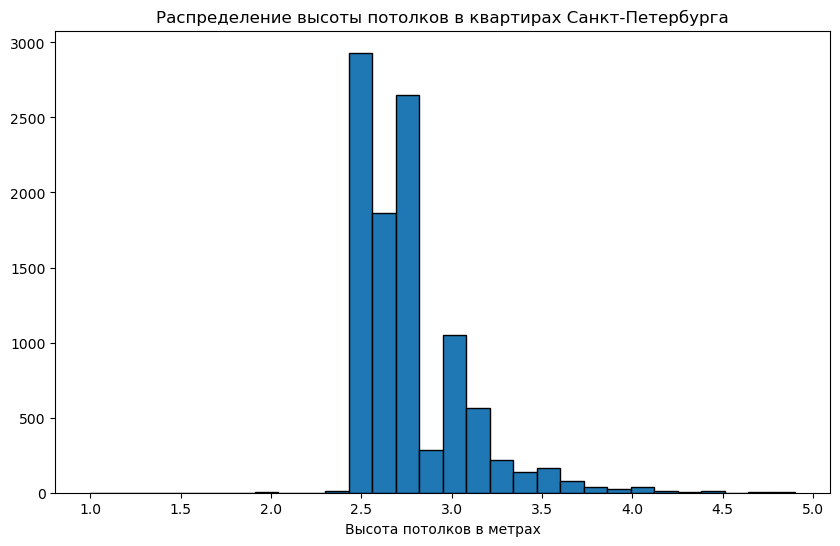

In [12]:
#Смотрим распределение высоты потолков в Санкт-Петербурге

data_spb_rooms = data[data['locality_name'] == 'Санкт-Петербург']

ceiling_height = data_spb_rooms['ceiling_height'].dropna()
ceiling_height = ceiling_height[ceiling_height <= 5]
ceiling_height = ceiling_height[ceiling_height >= 1]


plt.figure(figsize=(10,6))
plt.hist(ceiling_height, bins=30, edgecolor='black')
plt.title('Распределение высоты потолков в квартирах Санкт-Петербурга')
plt.xlabel('Высота потолков в метрах')
plt.show()

Распределение высоты потолков в квартирах Санкт-Петербурга показывает, что большинство квартир имеют потолки высотой от 2.5 до 3 метров. Это стандартные значения, которые обеспечивают комфортные условия для проживания. Высота потолков выше 3 метров наблюдается реже и обычно характерна для элитного жилья. Таким образом, средние значения высоты потолков соответствуют современным стандартам, обеспечивая комфорт и функциональность жилого пространства.

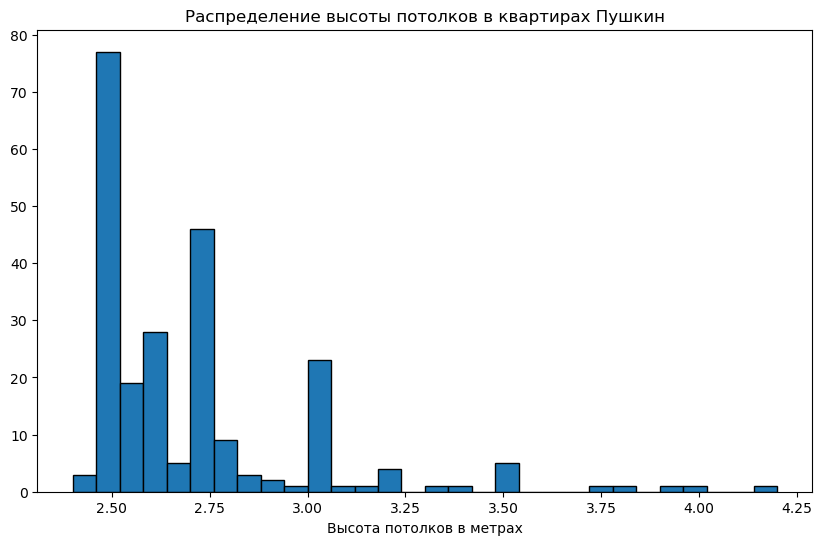

In [14]:
#Строим гистограмму по второму по дороговизне городу и считаем высоту потолков

cities_price = data.groupby('locality_name')['last_price'].mean().sort_values(ascending=False)

second_city = cities_price.index[1]

data_city = data[data['locality_name'] == second_city]

second_city_ceiling = data_city['ceiling_height'].dropna()
second_city_ceiling = second_city_ceiling[second_city_ceiling <= 5]  
second_city_ceiling = second_city_ceiling[second_city_ceiling >= 1] 

plt.figure(figsize=(10,6))
plt.hist(second_city_ceiling, bins=30, edgecolor='black')
plt.title(f'Распределение высоты потолков в квартирах {second_city}')
plt.xlabel('Высота потолков в метрах')
plt.show()

График демонстрирует распределение высоты потолков в квартирах города Пушкин, где преобладает высота около 2.5 метра, что, вероятно, является стандартом для большинства жилых помещений. Помимо этого, наблюдаются небольшие отклонения в диапазоне 2.6–3.0 метра, что указывает на наличие квартир с немного более высокими потолками. Редкие случаи высоты потолков от 3.25 до 4.25 метров, вероятно, связаны с единичными постройками, такими как старинные или элитные дома.

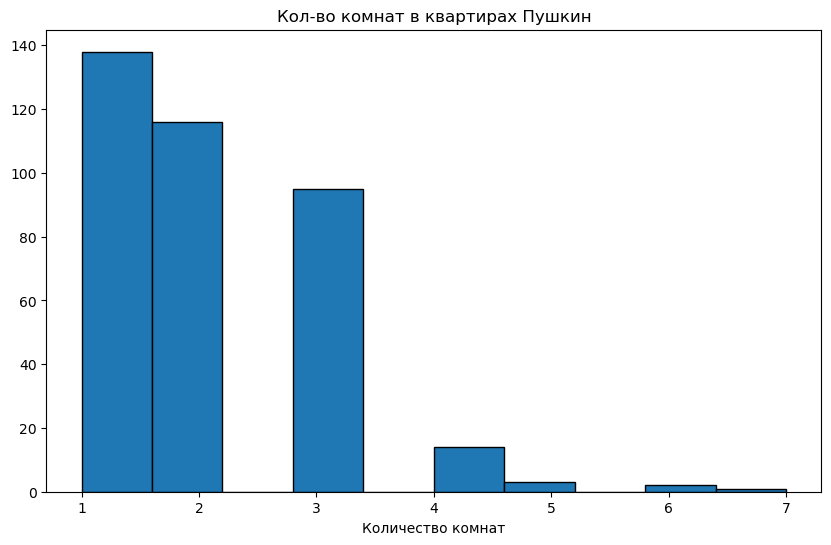

In [16]:
#Строим гистограмму по второму по дороговизне городу и считаем кол-во комнат в квартирах

data_city_rooms = data[data['locality_name'] == second_city]

rooms = data_city_rooms['rooms'].dropna()

plt.figure(figsize=(10,6))
plt.hist(rooms, edgecolor='black')
plt.title(f'Кол-во комнат в квартирах {second_city}')
plt.xlabel('Количество комнат')
plt.show()

Большинство квартир имеют одну или две комнаты, при этом однокомнатные квартиры встречаются немного чаще. Трёхкомнатные квартиры также распространены, но уже в меньшем количестве. Четырёхкомнатные квартиры встречаются редко, а квартиры с пятью или более комнатами – единичные случаи, что указывает на их эксклюзивность. Таким образом, рынок жилья в Пушкине состоит преимущественно из небольших квартир, что может отражать спрос на доступное жилье для небольших семей или одиночного проживания.

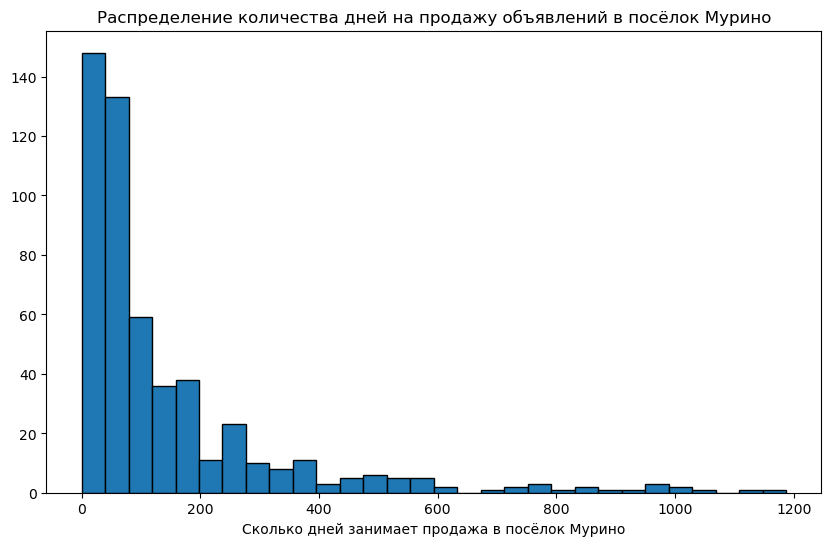

In [18]:
cities_count = data['locality_name'].value_counts()

second_city = cities_count.index[1]

data_second_city = data[data['locality_name'] == second_city]

if 'days_exposition' in data_second_city.columns:
    days_exposition = data_second_city['days_exposition'].dropna()
else:
    data_second_city['first_day_exposition'] = pd.to_datetime(data_second_city['first_day_exposition'])
    data_second_city['last_day_exposition'] = pd.to_datetime(data_second_city['last_day_exposition'])
    data_second_city['days_exposition'] = (data_second_city['last_day_exposition'] - data_second_city['first_day_exposition']).dt.days
    days_exposition = data_second_city['days_exposition'].dropna()

plt.figure(figsize=(10,6))
plt.hist(days_exposition, bins=30, edgecolor='black')
plt.title(f'Распределение количества дней на продажу объявлений в {second_city}')
plt.xlabel(f'Сколько дней занимает продажа в {second_city}')
plt.show()

Большинство объектов продаются в течение короткого срока — менее 100 дней, что указывает на высокий спрос или активность на рынке недвижимости в этом районе. По мере увеличения времени на продажу количество объектов уменьшается, но есть и редкие случаи, когда объекты остаются на рынке дольше, вплоть до 1200 дней. Это может указывать на объекты с уникальными характеристиками или недостатками, усложняющими продажу. В целом, график демонстрирует, что рынок недвижимости в Мурино достаточно динамичен, но присутствуют исключения с длительным сроком экспозиции.

### 5. Что вы можно сказать по данным из Санкт Петербурга и выбранному городу?

Количество комнат:

- В Санкт-Петербурге количество комнат в квартирах варьируется от 1 до 5 комнат, с большинством квартир имеющих 2-3 комнаты. Это отражает широкий диапазон предложений, типичный для крупного города.
- В городе Пушкин количество комнат варьируется от 1 до 4, при этом преобладают однокомнатные и двухкомнатные квартиры. Это может указывать на спрос на небольшие квартиры, подходящие для одиночного проживания или небольших семей, что типично для этого района.

  
Высота потолков:

- В Санкт-Петербурге высота потолков варьируется, с преобладанием квартир с потолками 2.5-3 метра, что характерно для городских квартир, однако встречаются также варианты с более высокими потолками.
- В Пушкине высота потолков в большинстве квартир составляет около 2.5 метра, что, вероятно, является стандартом для местного жилого фонда. Встречаются также квартиры с высотой потолков до 3 метров, но они являются исключением, что указывает на стандартизацию жилья в Пушкине.


### В каком из двух городов (Санкт-Петербург и Мурино) квартиры продаются быстрее?

На основе предоставленных графиков видно, что в Санкт-Петербурге квартиры продаются быстрее, чем в городе Пушкин. В Санкт-Петербурге большинство квартир находят своих покупателей в течение первых 200 дней, с наибольшей концентрацией продаж в диапазоне от 0 до 100 дней. В Пушкине также наблюдается активность на рынке, однако продажи зачастую занимают больше времени, и количество квартир, продающихся в короткие сроки, заметно меньше.

Таким образом, можно сделать вывод, что рынок в Санкт-Петербурге более активен, и квартиры там продаются быстрее по сравнению с Пушкиным.

### В каком из всех городов идет наименьшая средняя продолжительность продажи квартиры?
Судя по графикам, средняя продолжительность продажи квартиры в Санкт-Петербурге меньше, чем в Мурино. В Санкт-Петербурге значительная часть квартир продаётся в течение первых 50-100 дней, что указывает на активный рынок с высоким спросом. В Мурино также есть активность, но продажи там занимают больше времени в среднем. Следовательно, можно сделать вывод, что наименьшая средняя продолжительность продажи квартиры наблюдается в Санкт-Петербурге.


In [22]:
# Создаем отдельный столбец в датафрейм для удобства, где будет разметка того, находится ли недвижимость на последнем этаже или нет

data['is_top_floor'] = data['floor'] == data['floors_total']

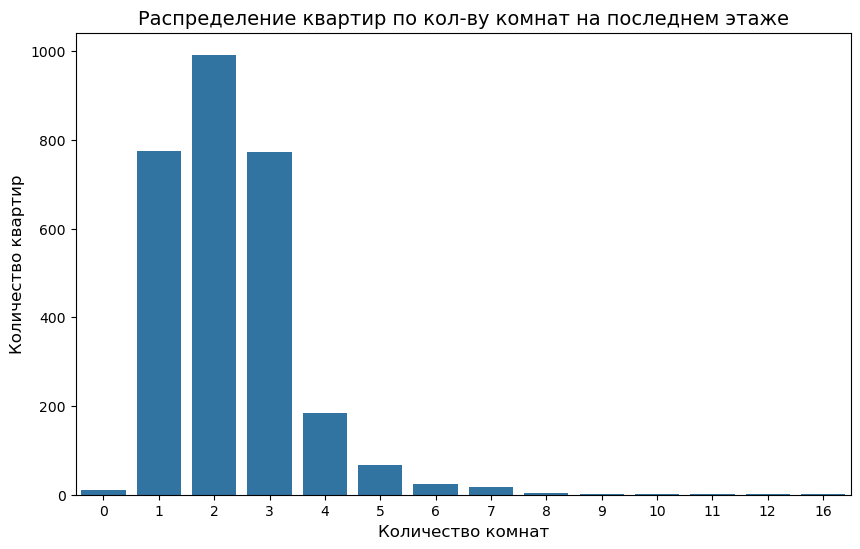

In [23]:
# Смотрим кол-во комнат по квартирам расположенным на последнем этаже по России

data_top_floor_apartments = data[data['is_top_floor']]

data_rooms_on_top_floor_apartments = data_top_floor_apartments.groupby('rooms').size()

plt.figure(figsize=(10,6))
sns.barplot(x=data_rooms_on_top_floor_apartments.index, y=data_rooms_on_top_floor_apartments.values)
plt.title('Распределение квартир по кол-ву комнат на последнем этаже', fontsize=14)
plt.xlabel('Количество комнат', fontsize=12)
plt.ylabel('Количество квартир', fontsize=12)
plt.show()

In [24]:
#9. Считаем среднюю цену квартир расположенных на последнем этаже

data_average_price_top_floor = data_top_floor_apartments['last_price'].median()
data_average_price_top_floor

4700000.0

### Выводы о проделанной работе:

В результате анализа рынка недвижимости можно сделать несколько важных выводов. Исследование показало, что в Санкт-Петербурге квартиры продаются быстрее, чем в других анализируемых регионах, что делает его привлекательным для инвестиций с целью быстрой перепродажи. Мурино также демонстрирует активность на рынке, особенно для одно- и двухкомнатных квартир, что свидетельствует о спросе на доступное жильё в пригородах. Эти данные подчеркивают важность учёта местных тенденций и предпочтений покупателей при планировании инвестиционной стратегии для оптимизации процесса перепродажи и увеличения прибыли.


### Где лучше всего брать квартиру, в Санкт-Петербурге или Мурино для дальнейшей перепродажи и сколько комнат лучше брать, чтобы произвести продажу быстрее?


Для успешной инвестиционной стратегии, направленной на быструю перепродажу квартиры, разумным решением будет рассмотреть покупку недвижимости в Мурино, который демонстрирует высокую активность на рынке. Несмотря на то, что Санкт-Петербург остаётся лидером по скорости продаж, рынок недвижимости в Мурино также привлекает покупателей, особенно тех, кто ищет доступное жильё недалеко от города.

Анализ показал, что наибольший спрос в Мурино сосредоточен на одно- и двухкомнатных квартирах. Эти объекты являются наиболее востребованными, поскольку идеально подходят для молодых семей, студентов и людей, работающих в Санкт-Петербурге, но предпочитающих жить за его пределами. Одно- и двухкомнатные квартиры имеют высокую ликвидность, что позволяет быстрее завершить процесс продажи и минимизировать время, затраченное на перепродажу